# Explore here

In [12]:
import pandas as pd
import numpy as np
import os

In [9]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv")
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [15]:
data.to_csv("/workspaces/Naive_bayes_project/data/raw/raw_data.csv", index=False)

In [23]:
data.drop(columns='package_name', inplace=True)


KeyError: "['package_name'] not found in axis"

In [24]:
data["review"] = data["review"].str.strip().str.lower()

In [25]:
data.head()


,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0


In [26]:
import string
data["review"] = data["review"].str.translate(str.maketrans("", "", string.punctuation))

In [29]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")  
stop_words = set(stopwords.words("english"))

data["review"] = data["review"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
data["review"] = data["review"].str.replace(r"\s+", " ", regex=True).str.strip()

In [31]:
data.head()

,review,polarity
0,privacy least put option appear offline mean p...,0
1,messenger issues ever since last update initia...,0
2,profile time wife anybody one post view would ...,0
3,new features suck us dont working back button ...,0
4,forced reload uploading pic replying comment l...,0


In [33]:
from sklearn.model_selection import train_test_split

X= data['review']
y = data['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear el vectorizador
vectorizer = CountVectorizer()

# Ajustar y transformar el conjunto de entrenamiento
X_train_counts = vectorizer.fit_transform(X_train)

# Aplicar la transformación al conjunto de prueba
X_test_counts = vectorizer.transform(X_test)

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [38]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

# Instanciar los modelos
gaussian_nb = GaussianNB()
multinomial_nb = MultinomialNB()
bernoulli_nb = BernoulliNB()

# Entrenar modelos
gaussian_nb.fit(X_train_tfidf.toarray(), y_train)  # Convertimos a array porque GaussianNB requiere datos numéricos continuos
multinomial_nb.fit(X_train_tfidf, y_train)
bernoulli_nb.fit(X_train_tfidf, y_train)

# Realizar predicciones
y_pred_gaussian = gaussian_nb.predict(X_test_tfidf.toarray())
y_pred_multinomial = multinomial_nb.predict(X_test_tfidf)
y_pred_bernoulli = bernoulli_nb.predict(X_test_tfidf)

# Evaluar modelos
acc_gaussian = accuracy_score(y_test, y_pred_gaussian)
acc_multinomial = accuracy_score(y_test, y_pred_multinomial)
acc_bernoulli = accuracy_score(y_test, y_pred_bernoulli)

print(f"Precisión GaussianNB: {acc_gaussian:.4f}")
print(f"Precisión MultinomialNB: {acc_multinomial:.4f}")
print(f"Precisión BernoulliNB: {acc_bernoulli:.4f}")


Precisión GaussianNB: 0.8156
Precisión MultinomialNB: 0.7989
Precisión BernoulliNB: 0.7821


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Definir el modelo base
nb_model = MultinomialNB()

# Definir el rango de valores de alpha para probar
param_grid = {"alpha": [0.1, 0.5, 1, 2, 5]}

# Implementar GridSearchCV
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_tfidf, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_["alpha"]

print(f"Mejor valor de alpha: {best_alpha}")

Mejor valor de alpha: 0.1


In [50]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_final = best_model.predict(X_test_tfidf)

# Compute final accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"Final Model Accuracy: {final_accuracy:.4f}")

Final Model Accuracy: 0.8324


In [53]:
from sklearn.metrics import classification_report

print("Desempeño final del modelo:\n")
print(classification_report(y_test, y_pred_final))

Desempeño final del modelo:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       126
           1       0.81      0.57      0.67        53

    accuracy                           0.83       179
   macro avg       0.82      0.76      0.78       179
weighted avg       0.83      0.83      0.82       179



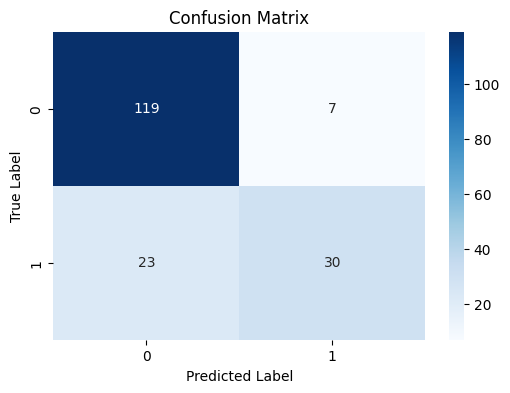

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Visualize it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ajustar el vectorizador para incluir unigrams y bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=5000)  # Usa unigramas y bigramas

# Transformar el conjunto de entrenamiento y prueba
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [60]:
from sklearn.naive_bayes import MultinomialNB

# Instanciar el modelo con el mejor alpha encontrado
best_model = MultinomialNB(alpha=0.1)

# Entrenar con los datos transformados con n-grams
best_model.fit(X_train_tfidf, y_train)

# Hacer predicciones
y_pred_ngram = best_model.predict(X_test_tfidf)

# Evaluar el rendimiento
from sklearn.metrics import accuracy_score, classification_report

accuracy_ngram = accuracy_score(y_test, y_pred_ngram)
print(f"Precisión con n-grams: {accuracy_ngram:.4f}")
print("Reporte de clasificación con n-grams:\n", classification_report(y_test, y_pred_ngram))

Precisión con n-grams: 0.8324
Reporte de clasificación con n-grams:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89       126
           1       0.77      0.62      0.69        53

    accuracy                           0.83       179
   macro avg       0.81      0.77      0.79       179
weighted avg       0.83      0.83      0.83       179



In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_ngram)

# Mostrar los valores numéricos
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[116  10]
 [ 20  33]]


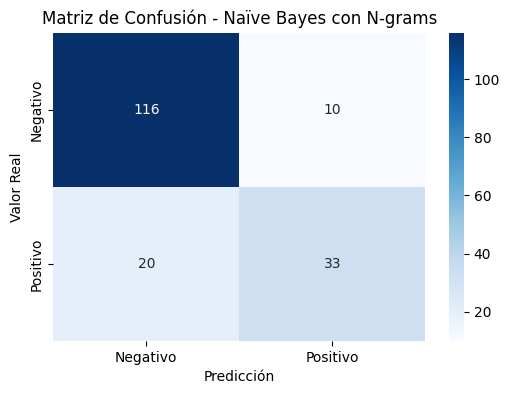

In [63]:
# Visualizar la matriz con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Naïve Bayes con N-grams")
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instanciar el modelo con parámetros iniciales
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos transformados con TF-IDF y n-grams
rf_model.fit(X_train_tfidf, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
# Predecir en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test_tfidf)

In [66]:
# Calcular la precisión
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Mostrar resultados
print(f"Precisión con Random Forest: {accuracy_rf:.4f}")
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_rf))

Precisión con Random Forest: 0.7989
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       126
           1       0.69      0.58      0.63        53

    accuracy                           0.80       179
   macro avg       0.76      0.74      0.75       179
weighted avg       0.79      0.80      0.79       179



In [67]:
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros
param_grid = {
    "n_estimators": [50, 100, 200],  # Número de árboles en el bosque
    "max_depth": [None, 10, 20],  # Profundidad máxima del árbol
    "min_samples_split": [2, 5, 10]  # Número mínimo de muestras para dividir un nodo
}

# Aplicar GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search_rf.fit(X_train_tfidf, y_train)

# Mejor modelo encontrado
best_rf_model = grid_search_rf.best_estimator_
best_params = grid_search_rf.best_params_

print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [68]:
# Hacer predicciones con el modelo optimizado
y_pred_rf_tuned = best_rf_model.predict(X_test_tfidf)

# Calcular precisión
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)

# Mostrar resultados
print(f"Precisión con Random Forest optimizado: {accuracy_rf_tuned:.4f}")
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_rf_tuned))

Precisión con Random Forest optimizado: 0.7989
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       126
           1       0.65      0.68      0.67        53

    accuracy                           0.80       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.80      0.80      0.80       179



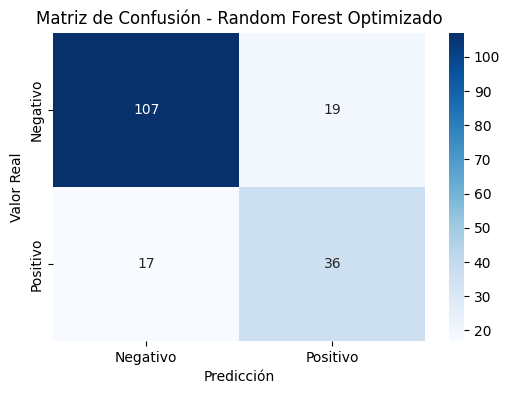

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf_tuned)

# Visualizar con Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Random Forest Optimizado")
plt.show()